In [ ]:
#Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#tf.keras.layers.Flatten

In [2]:
import numpy as np
import pandas as pd

In [ ]:
###Check the Tensorflow version

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
#Loading the dataset

In [5]:
train_data_dir = r'C:\Users\Rekha\Documents\edureka\training_set\training_set'
valid_data_dir = r'C:\Users\Rekha\Documents\edureka\test_set'

In [ ]:
#Visualize the Data

Populating the interactive namespace from numpy and matplotlib


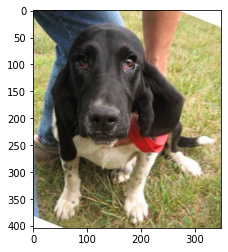

In [6]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img =mpimg.imread(r'C:\Users\Rekha\Documents\edureka\test_set\test_set\dogs\dog.4027.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
### Designing the Model

In [ ]:
###Initialize the parameters

In [7]:
img_width, img_height =150,150
nb_train_samples = 100
nb_validation_samples = 100
epochs = 20
validation = 20
batch_size = 20

In [ ]:
#check the shape of the image

Two ways to  to represent the image data as a three dimensional array

1. <b>  Channels Last:<b> Image data is represented in a three-dimensional array where the last channel represents the color channels, e.g. [rows][cols][channels].

2.  <b> Channels First:<b> Image data is represented in a three-dimensional array where the first channel represents the color channels, e.g. [channels][rows][cols].

In [8]:
import tensorflow.keras.backend as k
if k.image_data_format() =='channels_first':
    input_shape(3,img_widht,img_height)
else:
    input_shape =(img_width,img_height,3)

In [ ]:
###Data Augmentation

In [9]:
train_datagen =ImageDataGenerator (rescale=1. /255, shear_range=0.2, horizontal_flip =True)
test_datagen = ImageDataGenerator (rescale=1. /255)
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size = (img_width, img_height), batch_size =batch_size,class_mode='binary',classes=['cats','dogs'])
validation_generator =test_datagen.flow_from_directory(valid_data_dir,target_size = (img_width, img_height) , batch_size=batch_size)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 1 classes.


In [ ]:
###Visual Representations of imageDataGenerator

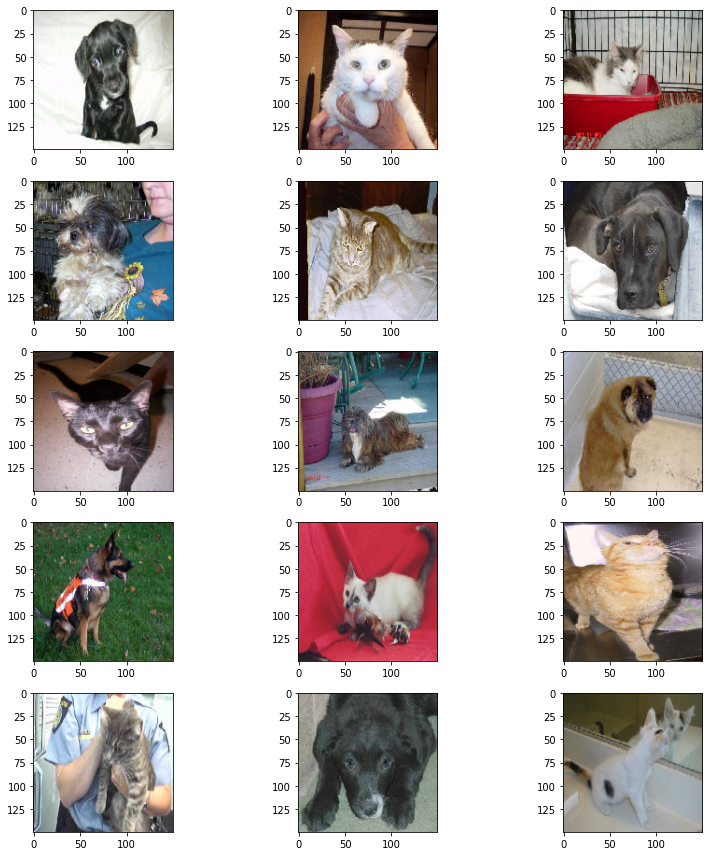

In [10]:
plt.figure(figsize=(12,12))
for i in range (0,15):
    plt.subplot(5, 3, i+1)
    for x_batch,y_batch in train_generator:
        image= x_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
#building the model

In [11]:
model =Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [ ]:
#compile the model

In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [ ]:
###Fit the basic CNN model

In [13]:
training = model.fit_generator(train_generator,
                              steps_per_epoch = nb_train_samples, epochs=epochs,
                              validation_data = validation_generator,
                              validation_steps =nb_validation_samples)

Epoch 1/20


C:\Users\Rekha\AppData\Local\Temp/ipykernel_11172/3224453127.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(train_generator,


100/100 [==============================] - 22s 181ms/step - loss: 1.7583 - accuracy: 0.5580 - val_loss: 0.7545 - val_accuracy: 0.3660
Epoch 2/20
100/100 [==============================] - 17s 172ms/step - loss: 0.6290 - accuracy: 0.6655 - val_loss: 0.5982 - val_accuracy: 0.7415
Epoch 3/20
100/100 [==============================] - 17s 172ms/step - loss: 0.6211 - accuracy: 0.6930 - val_loss: 0.8111 - val_accuracy: 0.5420
Epoch 4/20
100/100 [==============================] - 18s 176ms/step - loss: 0.5734 - accuracy: 0.7095 - val_loss: 0.8824 - val_accuracy: 0.4655
Epoch 5/20
100/100 [==============================] - 17s 172ms/step - loss: 0.5706 - accuracy: 0.7180 - val_loss: 0.8866 - val_accuracy: 0.5545
Epoch 6/20
100/100 [==============================] - 18s 175ms/step - loss: 0.5379 - accuracy: 0.7461 - val_loss: 0.9355 - val_accuracy: 0.5220
Epoch 7/20
100/100 [==============================] - 18s 176ms/step - loss: 0.5036 - accuracy: 0.7705 - val_loss: 1.1283 - val_accuracy: 0.4

In [ ]:
#Find the acuracy score

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


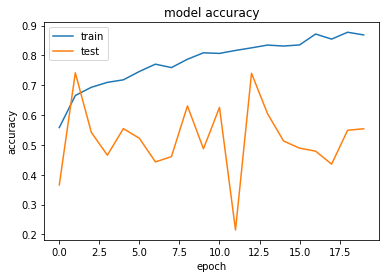

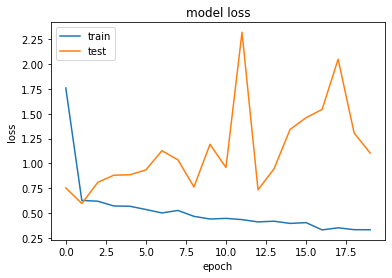

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


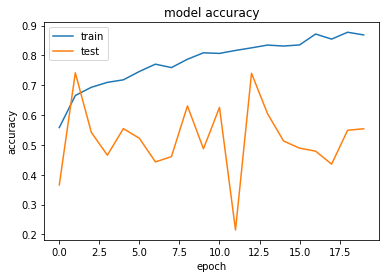

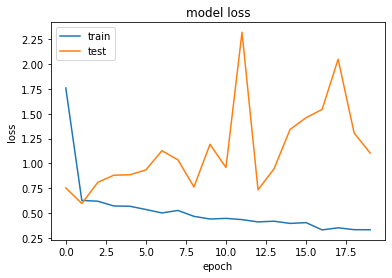

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
#predict the image

[[0.]]
Prediction:  Cat


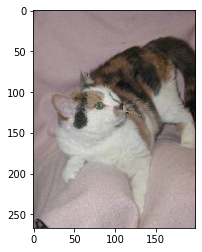

In [19]:
from tensorflow.keras.preprocessing import image
img_pred =image.load_img(r'C:\Users\Rekha\Documents\edureka\test_set\test_set\cats\cat.4012.jpg',target_size=(150,150))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)
rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction='Dog'
else:
    prediction = 'Cat'
    
print('Prediction: ',prediction)

img=mpimg.imread(r'C:\Users\Rekha\Documents\edureka\test_set\test_set\cats\cat.4012.jpg')
imgplot =plt.imshow(img)
plt.show()


[[0.00702381]]
Prediction:  Cat


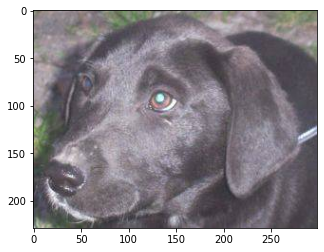

In [20]:
from tensorflow.keras.preprocessing import image
img_pred =image.load_img(r'C:\Users\Rekha\Documents\edureka\test_set\test_set\dogs\dog.4029.jpg',target_size=(150,150))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)
rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction='Dog'
else:
    prediction = 'Cat'
    
print('Prediction: ',prediction)

img=mpimg.imread(r'C:\Users\Rekha\Documents\edureka\test_set\test_set\dogs\dog.4029.jpg')
imgplot =plt.imshow(img)
plt.show()


In [21]:
#CNN model 2